# About Dataset

 In this Loan Status Prediction dataset,the bank will decide wheather to give a loan to the applicant based on some factor 
such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…
Goal is to build Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

## Imported the Libraries which are required

In [ ]:
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt  
import plotly.express as px
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score , roc_curve
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [53]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\dataseti\loan_data.csv')

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# Data Pre-Processing and Visualization

In [56]:
df=df.drop('Loan_ID',axis=1)

In [55]:
df.isnull().sum()[df.isnull().sum()>0]

Gender               5
Dependents           8
Self_Employed       21
Loan_Amount_Term    11
Credit_History      30
dtype: int64

In [57]:
df.Gender.fillna('Male',inplace=True)
df.Dependents.fillna(0,inplace=True)
df.Self_Employed.fillna('No',inplace=True)
df.Loan_Amount_Term.fillna(360,inplace=True)
df.Credit_History.fillna(1.0,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


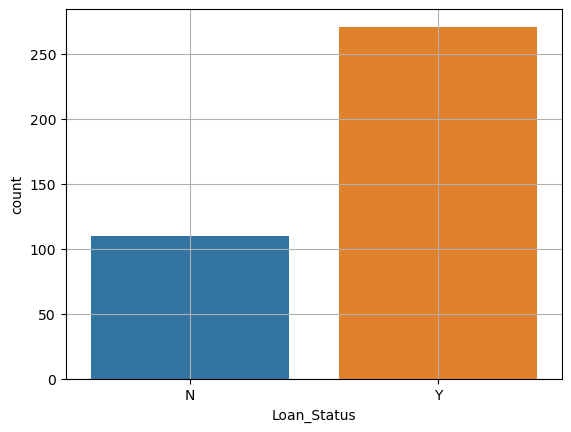

In [61]:
sns.countplot(x='Loan_Status',data=df); 
plt.grid()

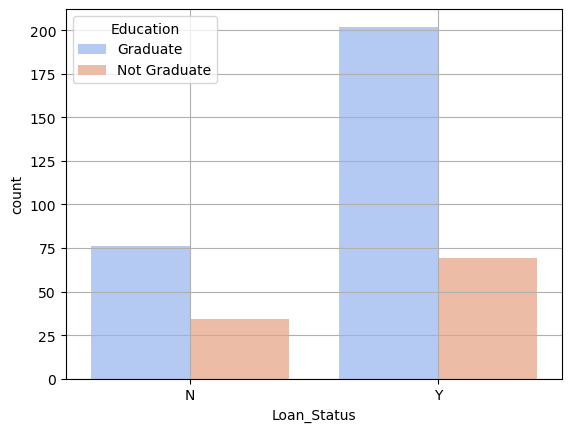

In [62]:
sns.countplot(x='Loan_Status',palette='coolwarm',hue='Education',data=df);
plt.grid()

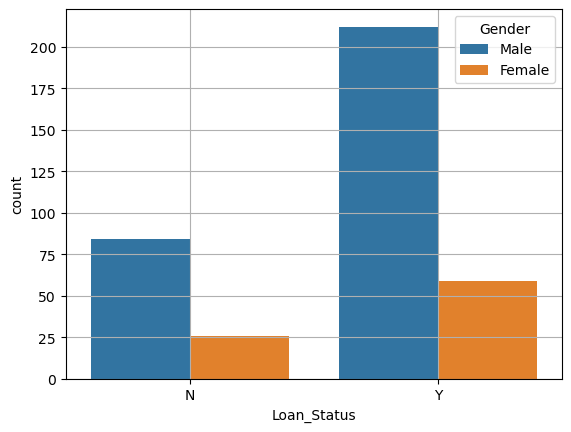

In [67]:
sns.countplot(x='Loan_Status',hue='Gender',data=df);
plt.grid()

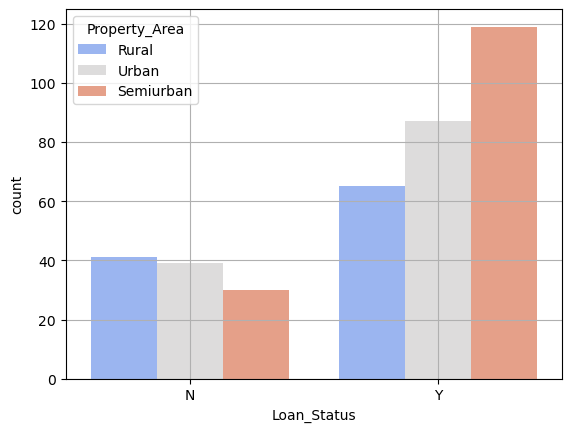

In [66]:
sns.countplot(x='Loan_Status',palette='coolwarm',hue='Property_Area',data=df);
plt.grid()

<Axes: >

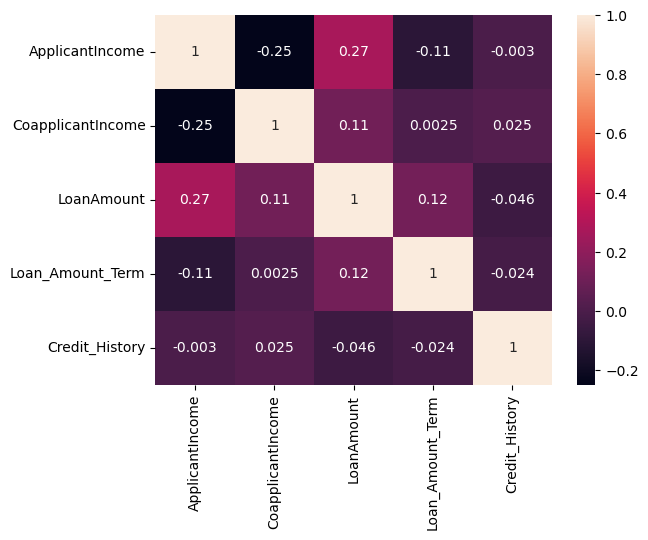

In [70]:
sns.heatmap(df.corr(),annot=True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ApplicantIncome'),
  Text(1, 0, 'CoapplicantIncome'),
  Text(2, 0, 'LoanAmount'),
  Text(3, 0, 'Loan_Amount_Term'),
  Text(4, 0, 'Credit_History')])

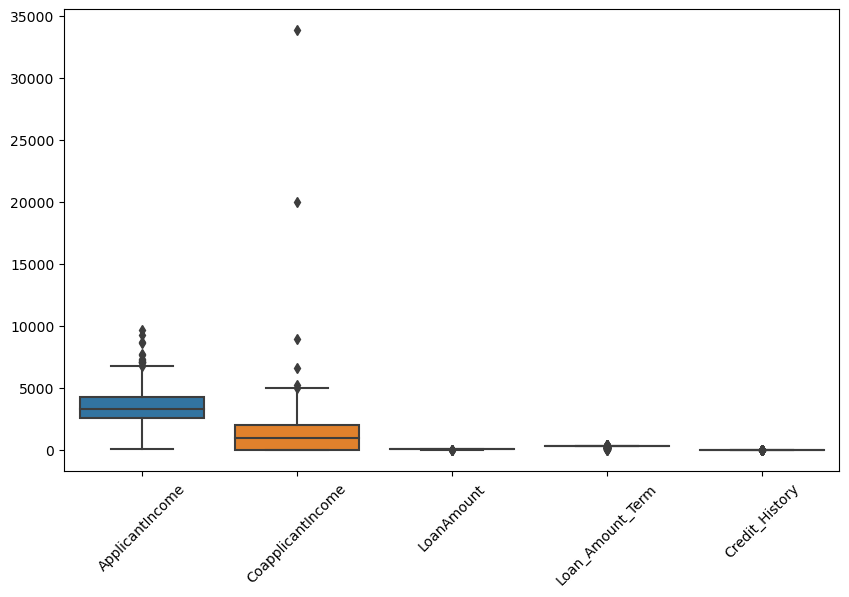

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)

In [10]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

# Coverting data into text into Numbers

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)

In [13]:
df.Dependents.replace({'1':1, '0':0, '2':2, '3+':3, 0:0},inplace=True)
df.Education.replace({'Graduate':1, 'Not Graduate':0},inplace=True)

# Split Data Into Train and Test

In [14]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=.2)

In [15]:
df.shape

(381, 12)

In [16]:
df_train_x=df_train.iloc[:,0:11]
df_train_y=df_train.iloc[:,-1]

df_test_x=df_test.iloc[:,0:11]
df_test_y=df_test.iloc[:,-1]

# Logistic Regression Model

In [78]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [79]:
logreg.fit(df_train_x,df_train_y)

LogisticRegression()

In [80]:
pred_test=logreg.predict(df_test_x)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

In [82]:
tab1=confusion_matrix(df_test_y,pred_test)

<Axes: >

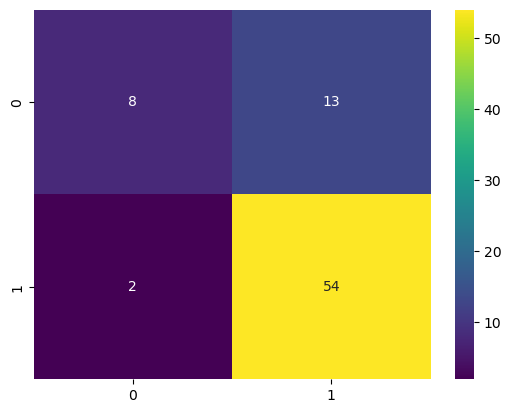

In [83]:
sns.heatmap(tab1, annot=True, cmap='viridis', cbar=True)

In [84]:
accuracy_score(df_test_y,pred_test)

0.8051948051948052

In [85]:
recall_score(df_test_y,pred_test)

0.9642857142857143

In [86]:
f1_score(df_test_y,pred_test)

0.8780487804878049

In [87]:
precision_score(df_test_y,pred_test)

0.8059701492537313

In [27]:
pred_prob_test = logreg.predict_proba(df_test_x)


In [28]:
roc_auc_score(df_test_y , pred_prob_test[: , 1]) 

0.6675170068027212

In [29]:
roc_curve(df_test_y , pred_prob_test[: , 1])

(array([0.        , 0.        , 0.04761905, 0.04761905, 0.0952381 ,
        0.0952381 , 0.19047619, 0.19047619, 0.23809524, 0.23809524,
        0.28571429, 0.28571429, 0.33333333, 0.33333333, 0.38095238,
        0.38095238, 0.42857143, 0.42857143, 0.47619048, 0.47619048,
        0.52380952, 0.52380952, 0.61904762, 0.61904762, 1.        ]),
 array([0.        , 0.01785714, 0.01785714, 0.07142857, 0.07142857,
        0.26785714, 0.26785714, 0.28571429, 0.28571429, 0.41071429,
        0.41071429, 0.42857143, 0.42857143, 0.58928571, 0.58928571,
        0.67857143, 0.67857143, 0.71428571, 0.71428571, 0.75      ,
        0.75      , 0.76785714, 0.76785714, 1.        , 1.        ]),
 array([       inf, 0.97943242, 0.96367806, 0.90459823, 0.90070957,
        0.86373907, 0.86243378, 0.86162974, 0.85836063, 0.84205707,
        0.8385629 , 0.8374483 , 0.83539036, 0.81878738, 0.81488921,
        0.8028593 , 0.80198421, 0.79599463, 0.79163189, 0.78351192,
        0.78240598, 0.77090596, 0.75697066, 

In [30]:
fpr , tpr, threshold =roc_curve(df_test_y , pred_prob_test[: , 1])

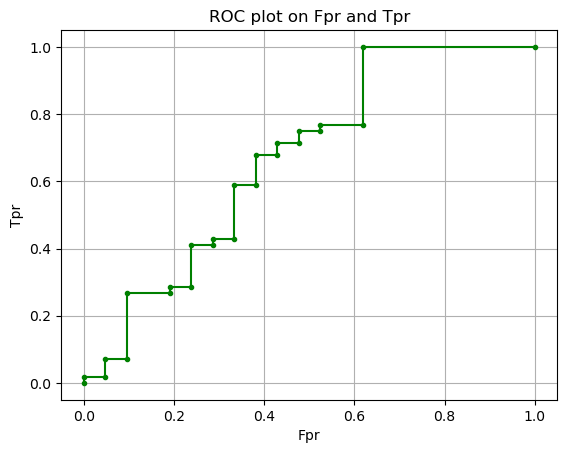

In [31]:
plt.plot(fpr , tpr , marker= '.', color = 'green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on Fpr and Tpr")
plt.grid()

# Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=5,min_samples_leaf =15)

In [33]:
dt.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)

In [34]:
pred_test_dt=dt.predict(df_test_x)

In [35]:
tab2=confusion_matrix(df_test_y,pred_test_dt)

<Axes: >

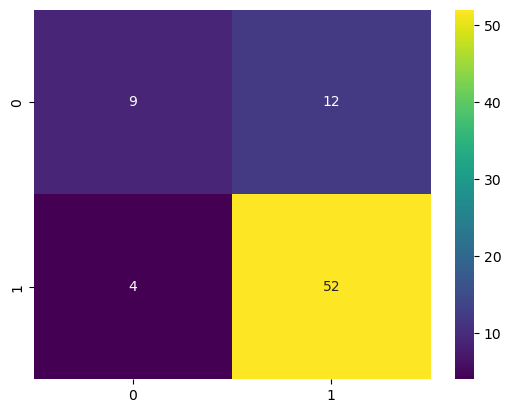

In [36]:
sns.heatmap(tab2, annot=True, cmap='viridis', cbar=True)

In [37]:
accuracy_score(df_test_y,pred_test_dt)

0.7922077922077922

In [38]:
recall_score(df_test_y,pred_test_dt)

0.9285714285714286

In [39]:
f1_score(df_test_y,pred_test_dt)

0.8666666666666666

In [40]:
precision_score(df_test_y,pred_test_dt)

0.8125

In [41]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05786174, 0.0205264 , 0.05533699, 0.        , 0.7847281 ,
       0.08154677])

In [42]:
df2 = pd.DataFrame()
df2['features']= df_train_x.columns
df2['imp']= dt.feature_importances_
df2.sort_values('imp' ,ascending= False)

,features,imp
9,Credit_History,0.784728
10,Property_Area,0.081547
5,ApplicantIncome,0.057862
7,LoanAmount,0.055337
6,CoapplicantIncome,0.020526
0,Gender,0.000000
1,Married,0.000000
2,Dependents,0.000000
3,Education,0.000000
4,Self_Employed,0.000000


# Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,min_samples_split=15)

In [44]:
rfc.fit(df_train_x,df_train_y)

RandomForestClassifier(min_samples_split=15, n_estimators=50)

In [45]:
pred_rfc=rfc.predict(df_test_x)
pred_rfc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
tab3=confusion_matrix(df_test_y,pred_rfc)

<Axes: >

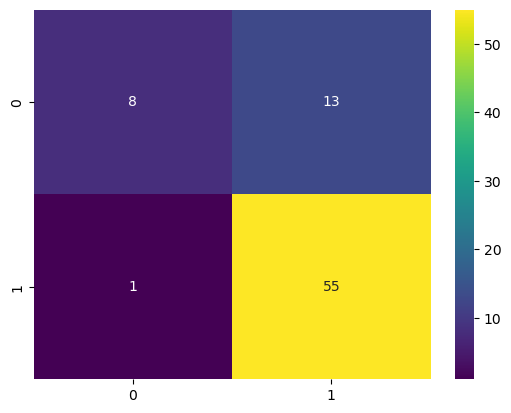

In [47]:
sns.heatmap(tab3, annot=True, cmap='viridis', cbar=True)

In [48]:
accuracy_score(df_test_y,pred_rfc)

0.8181818181818182

In [49]:
recall_score(df_test_y,pred_rfc)

0.9821428571428571

In [50]:
f1_score(df_test_y,pred_rfc)

0.8870967741935484

## Logistic Regression and Random forest Algorithm are giving accuracy around 81%